# Brain Tumor Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
from pathlib import Path

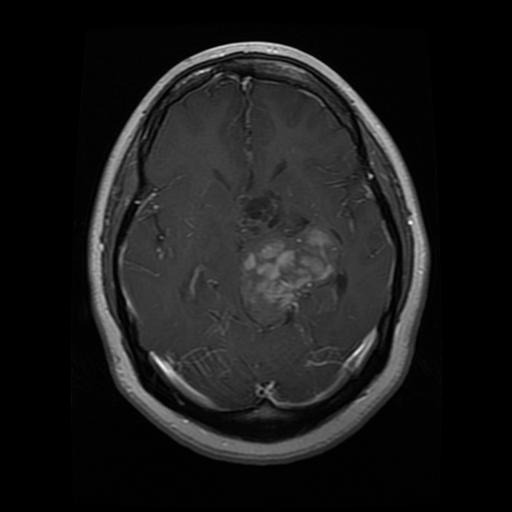

In [12]:
path = Path().cwd().parent / 'data' / 'Training' / 'glioma_tumor'
name = 'gg (1).jpg'
fullname = path / name
load_img(fullname)

In [13]:
img = load_img(fullname)
x = np.array(img)
x.shape

(512, 512, 3)